In [ ]:
# Loading all required dependencies and packages

%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

import IPython
print("IPython: ", IPython.__version__)

import csv
print("csv: ", csv.__version__)

import pandas as pd
print("pandas: ", pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print("matplotlib: ", matplotlib.__version__)

import numpy as np
print("numpy: ", np.__version__)

import sklearn
print("Scikit Learn: ", sklearn.__version__)
import math
import pylab
import time
import pprint as pp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from IPython.display import Image
from __future__ import division

IPython:  7.34.0
csv:  1.0
pandas:  1.5.3
matplotlib:  3.7.1
numpy:  1.23.5
Scikit Learn:  1.2.2


In [ ]:
#setting display options for pandas dataframe outputs
pd.options.display.max_columns = 50
pd.options.display.max_rows = 300

#ini_dataset is the as-is load of the sfe data without any processing
ini_dataset = pd.read_csv('/content/extended_dataset.xlsx - wt%.csv', delimiter =',',index_col = None, header = 0)
colheaders = list(ini_dataset.columns.values)

print (colheaders)
print ("\n")
print (ini_dataset.head(2))

['C', 'N', 'P', 'S', 'V', 'Ni', 'Nb', 'Al', 'Ti', 'Fe', 'Hf', 'Mo', 'Mn', 'Co', 'Si', 'Cr', 'Cu', 'Zn', 'SFE', 'Error', 'title', 'Author', 'temperature', 'experiment_type']


       C      N      P      S    V    Ni   Nb   Al   Ti      Fe   Hf   Mo  \
0  0.004  0.003  0.025  0.001  0.0  15.6  0.0  0.0  0.0  64.317  0.0  2.5   
1  0.020  0.009  0.022  0.001  0.0  15.6  0.0  0.0  0.0  64.188  0.0  2.5   

     Mn   Co    Si    Cr   Cu  Zn   SFE     Error  \
0  0.03  0.0  0.02  17.5  0.0   0  51.6  0.014341   
1  0.03  0.0  0.03  17.6  0.0   0  54.6  0.023810   

                                               title            Author  \
0  The Effect of Chemical Composition and Heat Tr...  Yonezawa, Toshio   
1  The Effect of Chemical Composition and Heat Tr...  Yonezawa, Toshio   

   temperature experiment_type  
0        300.0      TEM - WBDF  
1        300.0      TEM - WBDF  


In [ ]:
print( "There are total %d observations in the dataset" %len(ini_dataset))

print( "There are total %d observations in the dataset that are room temperature measurements"% \
len(ini_dataset[(ini_dataset.temperature>290) & (ini_dataset.temperature<310)]))

#the subset with room temperature measurments
ini_dataset_1 = ini_dataset[(ini_dataset.temperature>290) & (ini_dataset.temperature<310)]

print ("There are total %d observations in the room temp dataset" %len(ini_dataset_1))

There are total 531 observations in the dataset
There are total 483 observations in the dataset that are room temperature measurements
There are total 483 observations in the room temp dataset


In [ ]:
ini_dataset_2 = ini_dataset_1
#dropping columns url and doi
print (ini_dataset_2.columns.values)
print( len(ini_dataset_2.columns.values))
print (ini_dataset_2.columns[[17,18]], "\n")
# ini_dataset_2 = ini_dataset_2.drop(['DOI','url'],axis=1)
print (ini_dataset_2.columns.values)
print (len(ini_dataset_2.columns.values))
ini_dataset_3 = ini_dataset_2

['C' 'N' 'P' 'S' 'V' 'Ni' 'Nb' 'Al' 'Ti' 'Fe' 'Hf' 'Mo' 'Mn' 'Co' 'Si'
 'Cr' 'Cu' 'Zn' 'SFE' 'Error' 'title' 'Author' 'temperature'
 'experiment_type']
24
Index(['Zn', 'SFE'], dtype='object') 

['C' 'N' 'P' 'S' 'V' 'Ni' 'Nb' 'Al' 'Ti' 'Fe' 'Hf' 'Mo' 'Mn' 'Co' 'Si'
 'Cr' 'Cu' 'Zn' 'SFE' 'Error' 'title' 'Author' 'temperature'
 'experiment_type']
24


In [ ]:
colheaders_2 = ['C','N','P','S','V','Ni','Nb','Mn','Al','Ti','Fe','Hf','Mo','Mn','Co','Si','Cr','Cu','Zn']

#checking for measurements where alloying additions are 1) existing 2) beyond a certain value
for item in colheaders_2 :
    print ( item, len(ini_dataset_3[ini_dataset_3[item]> 0]), len(ini_dataset_3[ini_dataset_3[item]> 0.05]))
ini_dataset_4 = ini_dataset_3

C 394 140
N 267 99
P 176 9
S 175 1
V 2 2
Ni 355 355
Nb 6 6
Mn 369 281
Al 49 37
Ti 7 7
Fe 451 451
Hf 1 1
Mo 175 140
Mn 369 281
Co 28 28
Si 257 135
Cr 386 385
Cu 29 29
Zn 7 7


In [ ]:
index = range(1,len(ini_dataset_4)+1)

#ini_dataset_5 is a another dataframe to make some format changes and let ini_dataset_4 be as-is
ini_dataset_5 = ini_dataset_4
print (len(ini_dataset_5))
ini_dataset_5.insert(0,'sno',index)

483


In [ ]:

def normalize_data(data):

    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)

    return normalized_data, scaler

In [ ]:
ini_dataset_5 = ini_dataset_5.set_index(['sno'])
#display preview of final dataframe
ini_dataset_5.head()

,C,N,P,S,V,Ni,Nb,Al,Ti,Fe,Hf,Mo,Mn,Co,Si,Cr,Cu,Zn,SFE,Error,title,Author,temperature,experiment_type
sno,,,,,,,,,,,,,,,,,,,,,,,,
1,0.004,0.003,0.025,0.001,0.0,15.6,0.0,0.0,0.0,64.317,0.0,2.5,0.03,0.0,0.02,17.5,0.0,0,51.6,0.014341,The Effect of Chemical Composition and Heat Tr...,"Yonezawa, Toshio",300.0,TEM - WBDF
2,0.020,0.009,0.022,0.001,0.0,15.6,0.0,0.0,0.0,64.188,0.0,2.5,0.03,0.0,0.03,17.6,0.0,0,54.6,0.023810,The Effect of Chemical Composition and Heat Tr...,"Yonezawa, Toshio",300.0,TEM - WBDF
3,0.020,0.002,0.027,0.002,0.0,14.0,0.0,0.0,0.0,66.409,0.0,2.4,0.03,0.0,0.01,17.1,0.0,0,50.3,0.023062,The Effect of Chemical Composition and Heat Tr...,"Yonezawa, Toshio",300.0,TEM - WBDF
4,0.005,0.001,0.026,0.002,0.0,15.6,0.0,0.0,0.0,63.866,0.0,2.6,0.19,0.0,0.01,17.7,0.0,0,52.8,0.012879,The Effect of Chemical Composition and Heat Tr...,"Yonezawa, Toshio",300.0,TEM - WBDF
5,0.016,0.008,0.025,0.002,0.0,10.8,0.0,0.0,0.0,68.899,0.0,0.3,0.85,0.0,0.10,19.0,0.0,0,35.0,0.023429,The Effect of Chemical Composition and Heat Tr...,"Yonezawa, Toshio",300.0,TEM - WBDF


In [ ]:
ini_array = ini_dataset_5.reset_index().values
print (ini_array.shape)
print (ini_array[2,:])
print("\n")
print(ini_dataset_5.columns)


(483, 25)
[3 0.02 0.002 0.027 0.002 0.0 14.0 0.0 0.0 0.0 66.409 0.0 2.4 0.03 0.0
 0.01 17.1 0.0 0 50.3 0.023062
 'The Effect of Chemical Composition and Heat Treatment Conditions on Stacking Fault Energy for Fe-Cr-Ni Austenitic Stainless Steel'
 'Yonezawa, Toshio' 300.0 'TEM - WBDF']


Index(['C', 'N', 'P', 'S', 'V', 'Ni', 'Nb', 'Al', 'Ti', 'Fe', 'Hf', 'Mo', 'Mn',
       'Co', 'Si', 'Cr', 'Cu', 'Zn', 'SFE', 'Error', 'title', 'Author',
       'temperature', 'experiment_type'],
      dtype='object')


In [ ]:
SFEdata = ini_array[:,0:20]
SFEdata = np.array(SFEdata, dtype='float')
print(SFEdata[0,:])
#constructing a band of SFE values based on error bars (SFE low and SFE high)
low = SFEdata[:,11]*(1 - SFEdata[:,12])
high = SFEdata[:,11]*(1 + SFEdata[:,12])
lowhigh = np.column_stack((low,high))
SFEdata.shape

[1.0000e+00 4.0000e-03 3.0000e-03 2.5000e-02 1.0000e-03 0.0000e+00
 1.5600e+01 0.0000e+00 0.0000e+00 0.0000e+00 6.4317e+01 0.0000e+00
 2.5000e+00 3.0000e-02 0.0000e+00 2.0000e-02 1.7500e+01 0.0000e+00
 0.0000e+00 5.1600e+01]


(483, 20)

In [ ]:
col=['C', 'N', 'P', 'S', 'V', 'Ni', 'Nb', 'Al', 'Ti', 'Fe', 'Hf', 'Mo', 'Mn',
       'Co', 'Si', 'Cr', 'Cu', 'Zn', 'SFE']

In [ ]:
norm_SFEdata,s=normalize_data(SFEdata[:,1:20])
SFEdata_df_norm= pd.DataFrame(norm_SFEdata, columns=col)

correlation_matrix = SFEdata_df_norm.corr()

print(correlation_matrix)

            C         N         P         S         V        Ni        Nb  \
C    1.000000  0.047551 -0.072146 -0.012707 -0.012567 -0.162707 -0.018806   
N    0.047551  1.000000  0.057165  0.075193 -0.013440 -0.079814 -0.020357   
P   -0.072146  0.057165  1.000000  0.642087 -0.033350  0.104818 -0.050798   
S   -0.012707  0.075193  0.642087  1.000000 -0.019102 -0.000312 -0.029122   
V   -0.012567 -0.013440 -0.033350 -0.019102  1.000000  0.221643  0.182044   
Ni  -0.162707 -0.079814  0.104818 -0.000312  0.221643  1.000000  0.272181   
Nb  -0.018806 -0.020357 -0.050798 -0.029122  0.182044  0.272181  1.000000   
Al   0.043093 -0.047999 -0.115587 -0.052515 -0.015246 -0.215866 -0.023248   
Ti  -0.021988 -0.023513 -0.058282 -0.033413  0.587149  0.390430  0.560575   
Fe  -0.175503 -0.159138 -0.027790  0.010357 -0.149692 -0.425753 -0.185452   
Hf  -0.008783 -0.009393 -0.023282 -0.013347 -0.002968  0.146795  0.615978   
Mo  -0.101940 -0.043457  0.461131 -0.012013 -0.038183  0.181041  0.131282   

In [ ]:
# Assuming df is your DataFrame
column_of_interest = "SFE"

# Extract the column of interest
col_interest_values = SFEdata_df_norm[column_of_interest]

# Calculate correlations with other columns
correlation_matrix = SFEdata_df_norm.corrwith(col_interest_values)

# Display the correlation matrix
print("Correlation Matrix of {} with other columns:".format(column_of_interest))
print(correlation_matrix)

Correlation Matrix of SFE with other columns:
C     -0.094143
N     -0.027927
P      0.251964
S      0.115677
V     -0.081571
Ni     0.381422
Nb    -0.113045
Al     0.033215
Ti    -0.129453
Fe    -0.106403
Hf    -0.077852
Mo     0.304290
Mn    -0.292703
Co    -0.090028
Si    -0.178853
Cr     0.133817
Cu    -0.028815
Zn    -0.073295
SFE    1.000000
dtype: float64


In [ ]:
SFEclass = np.zeros(SFEdata.shape[0])
SFEclass[SFEdata[:,19] <= 20] = 1
SFEclass[(SFEdata[:,19] > 20) & (SFEdata[:,19] <= 45)] = 2
SFEclass[(SFEdata[:,19] > 45)] = 3


#check number of entries for each class
print((SFEclass == 1).sum())
print((SFEclass == 2).sum())
print((SFEclass == 3).sum())

#check if only the needed classes there
print ((SFEclass == 1).sum() + (SFEclass == 2).sum() + (SFEclass == 3).sum())
print (SFEclass.shape)
print (SFEdata.shape)

118
260
102
480
(483,)
(483, 20)


In [ ]:
element_data=SFEdata[:,1:20]
print(element_data.shape)
print(element_data[0,:])
element_data[np.isnan(element_data)] = 0

(483, 19)
[4.0000e-03 3.0000e-03 2.5000e-02 1.0000e-03 0.0000e+00 1.5600e+01
 0.0000e+00 0.0000e+00 0.0000e+00 6.4317e+01 0.0000e+00 2.5000e+00
 3.0000e-02 0.0000e+00 2.0000e-02 1.7500e+01 0.0000e+00 0.0000e+00
 5.1600e+01]


In [ ]:
print(element_data[0][18])
print(element_data[0][-1])
print(element_data[0])
print(element_data[0][0])
#18th index have sfe
#total 18 features

51.6
51.6
[4.0000e-03 3.0000e-03 2.5000e-02 1.0000e-03 0.0000e+00 1.5600e+01
 0.0000e+00 0.0000e+00 0.0000e+00 6.4317e+01 0.0000e+00 2.5000e+00
 3.0000e-02 0.0000e+00 2.0000e-02 1.7500e+01 0.0000e+00 0.0000e+00
 5.1600e+01]
0.004


In [ ]:
features = element_data[:, :18]
sfe_column = element_data[:, 18]#sfe numerical value

In [ ]:
Ni_values = features[:, 5]
non_zero_count = np.count_nonzero(Ni_values)
print("Ni :", non_zero_count)
co_values = features[:, 13]
non_zero_count = np.count_nonzero(co_values)
print("Co :", non_zero_count)
si_values = features[:, 14]
non_zero_count = np.count_nonzero(si_values)
print("Si :", non_zero_count)

Ni : 355
Co : 28
Si : 257


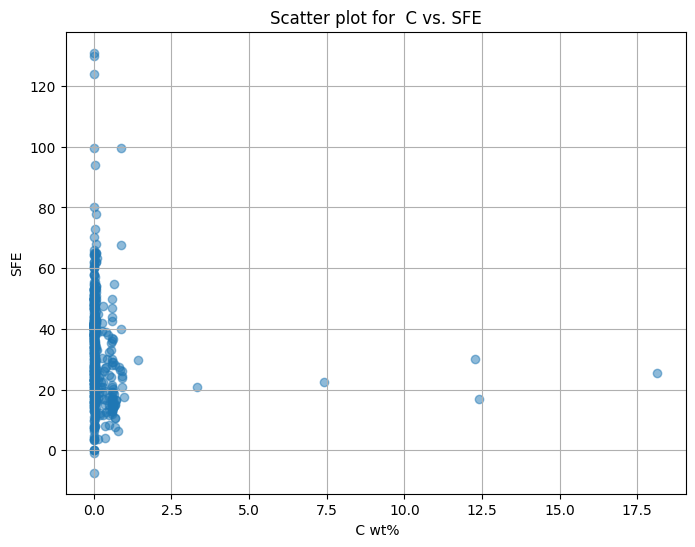

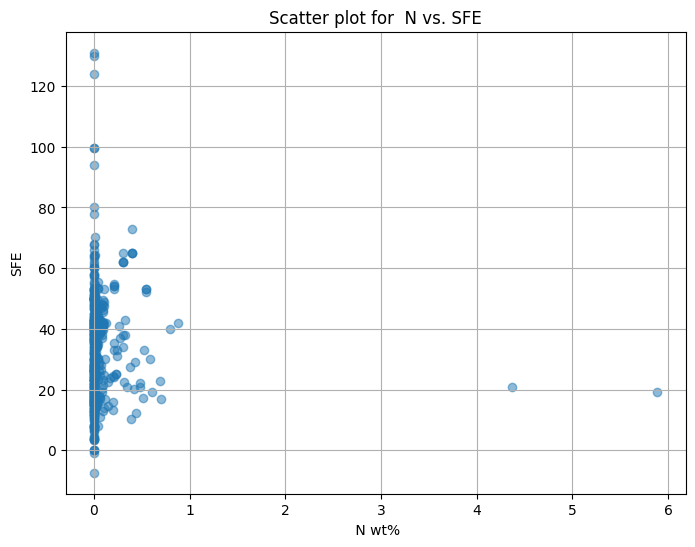

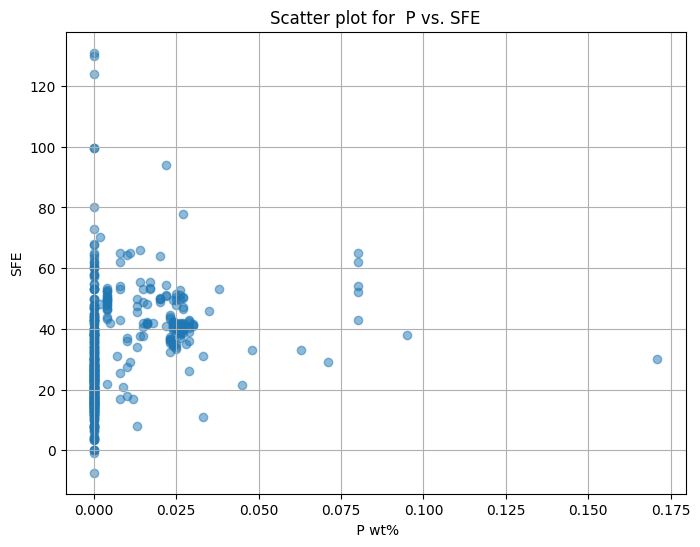

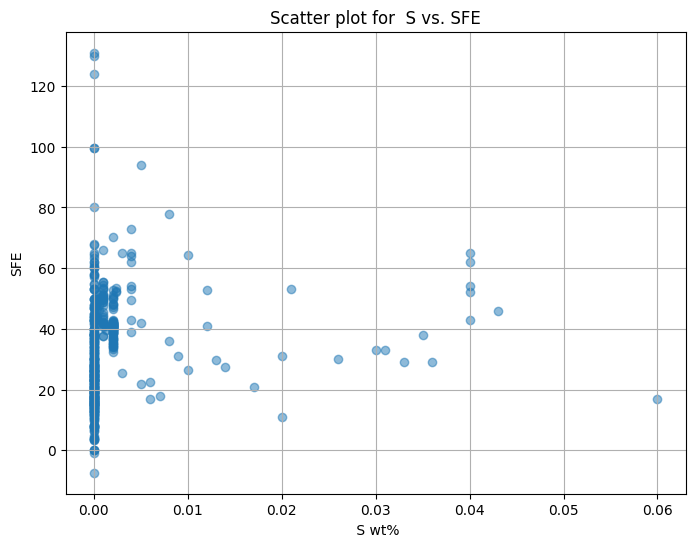

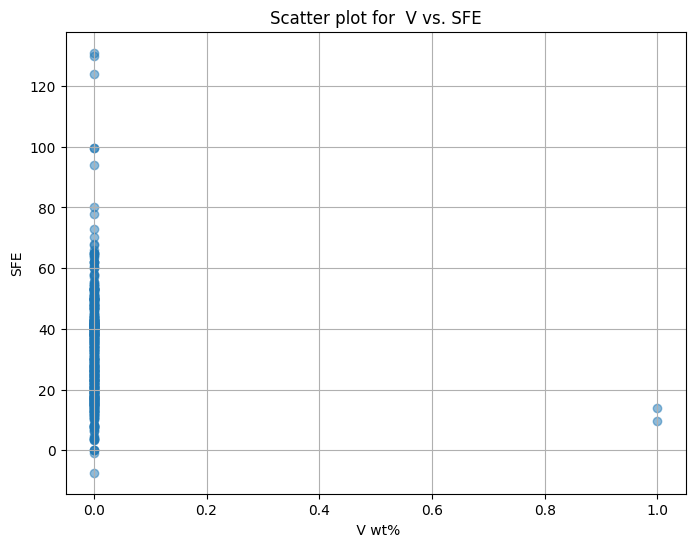

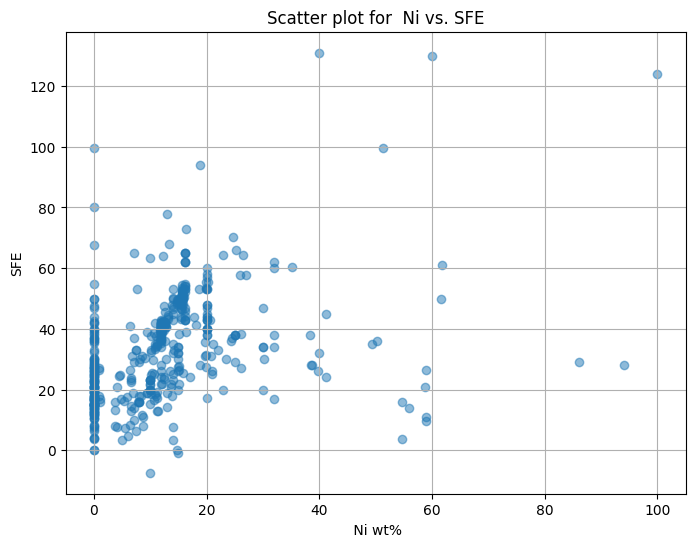

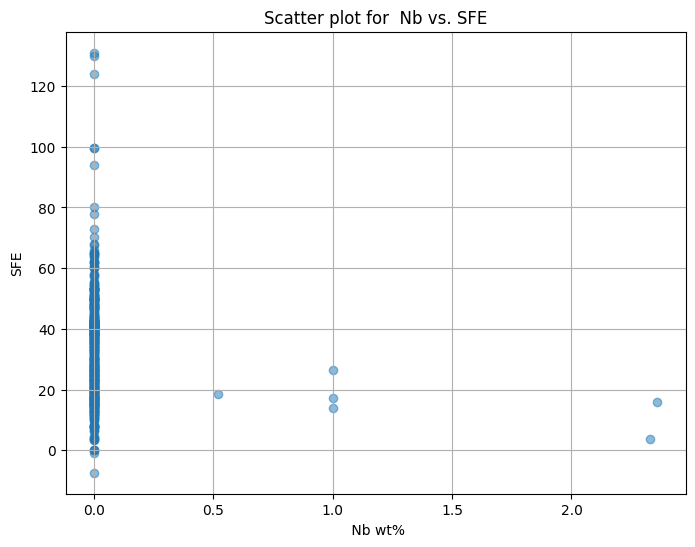

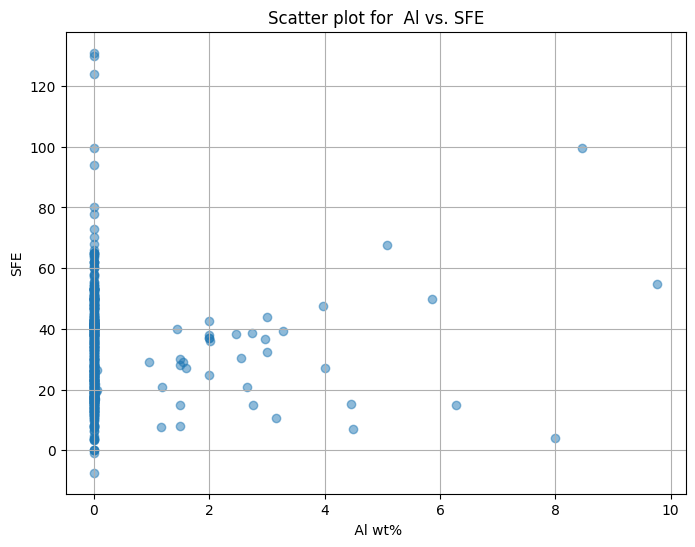

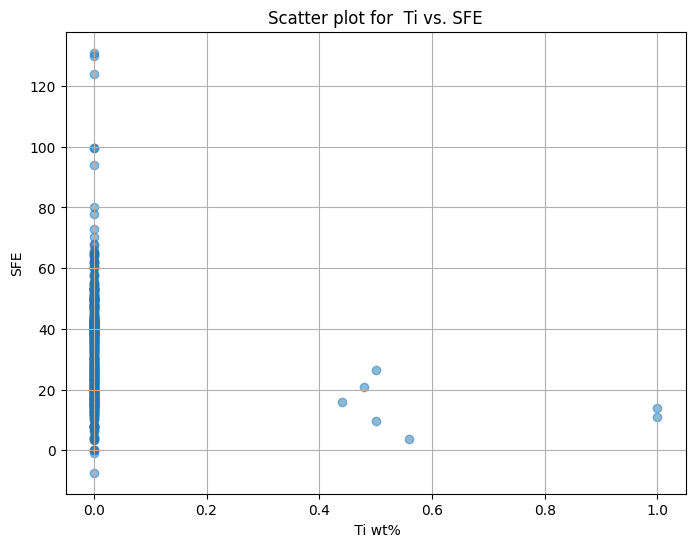

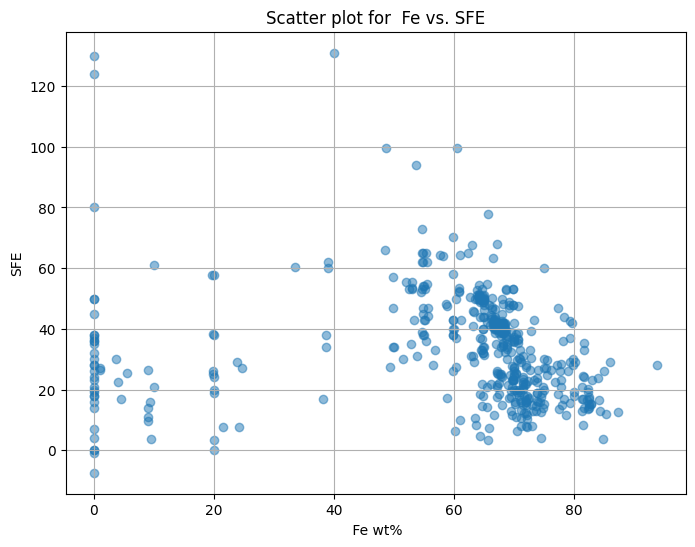

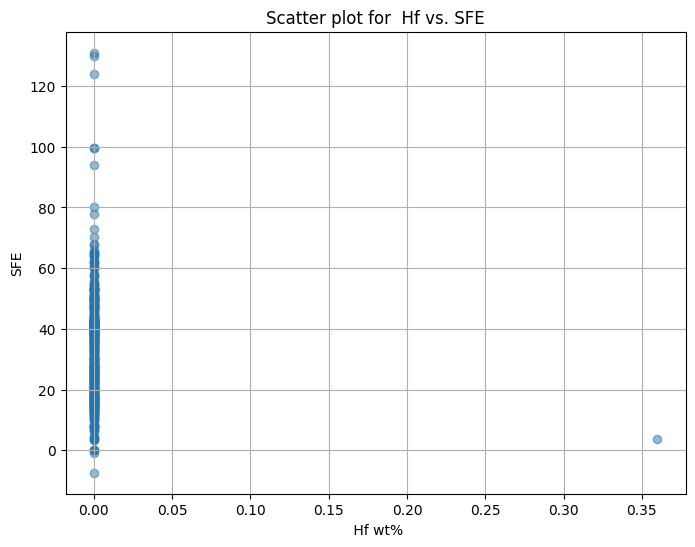

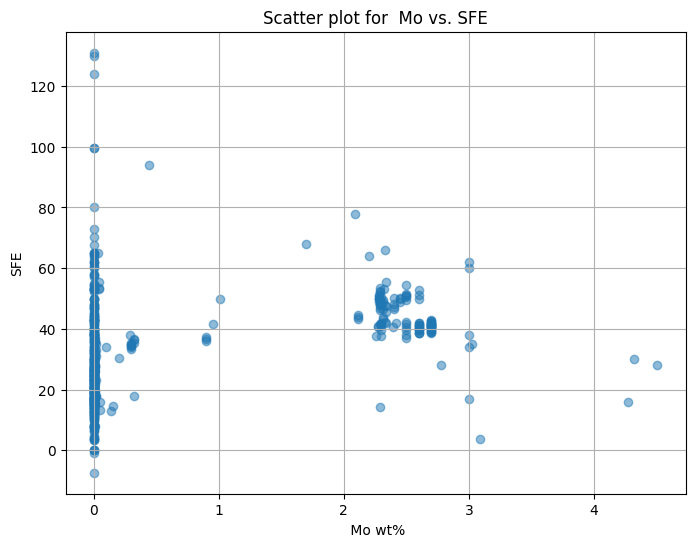

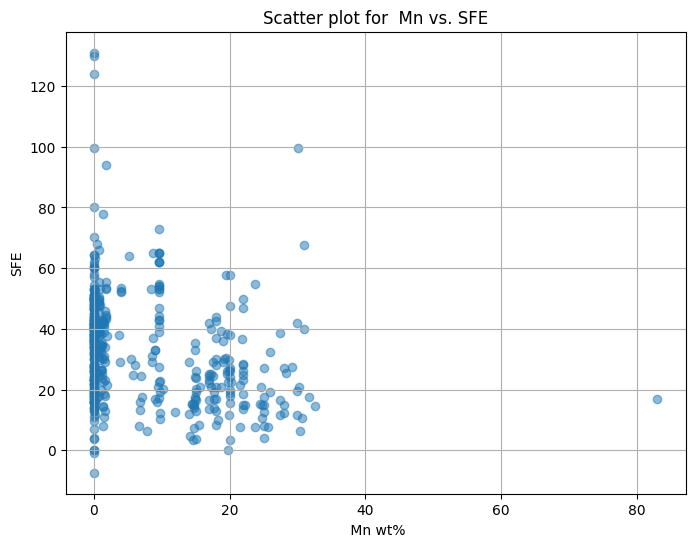

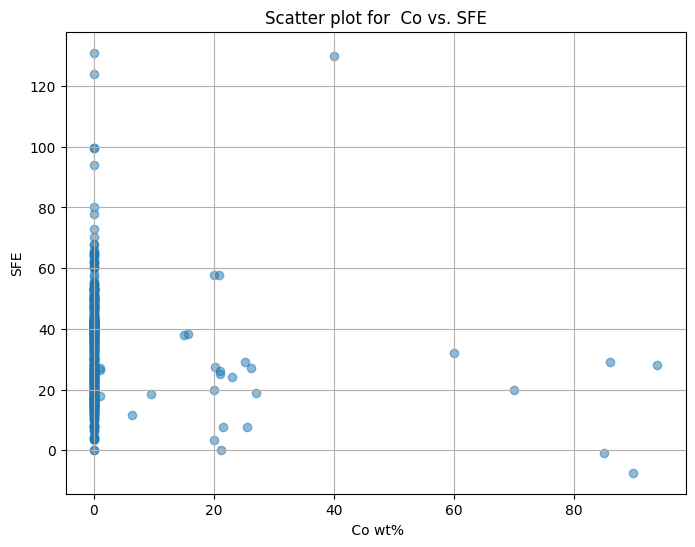

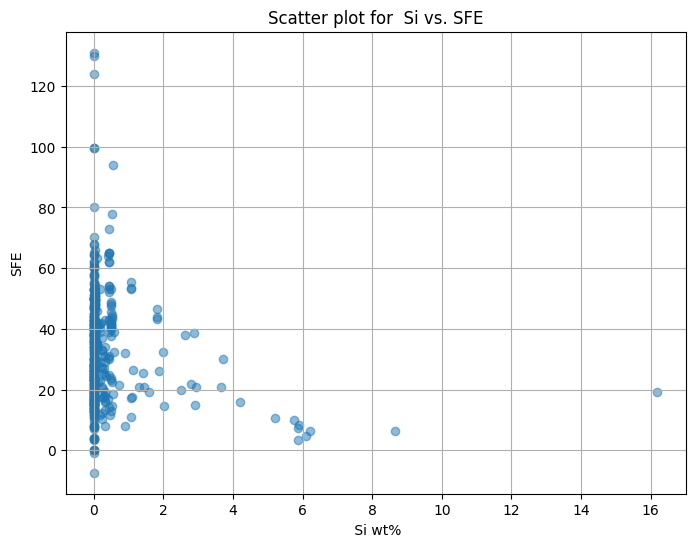

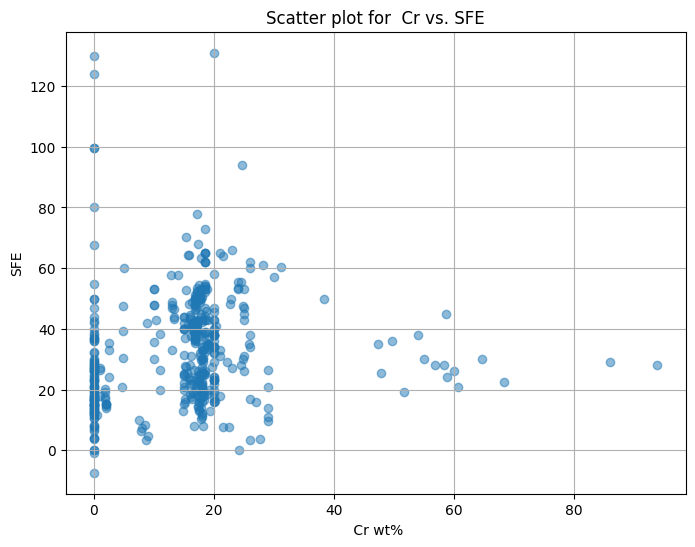

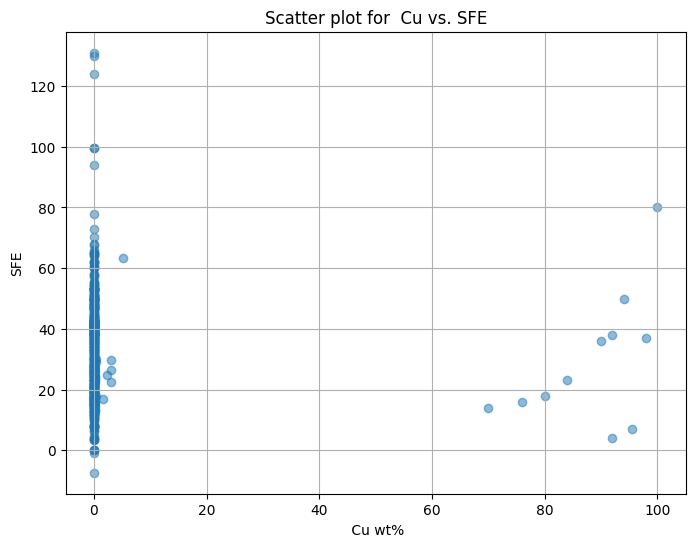

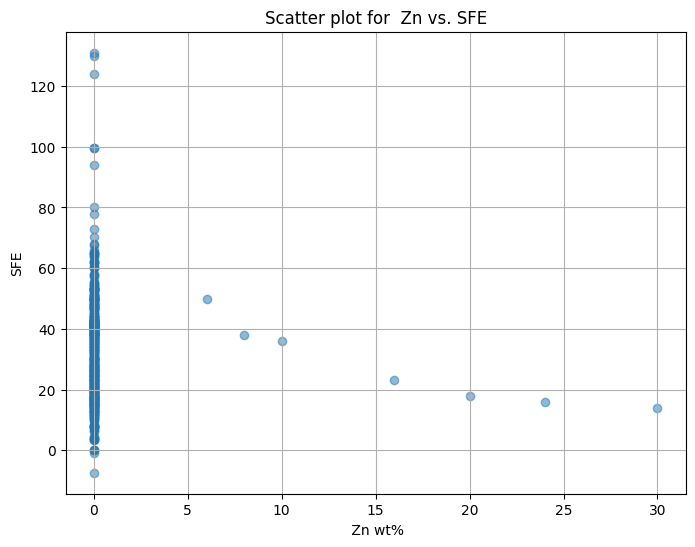

In [ ]:
feature_name=['C', 'N', 'P', 'S', 'V', 'Ni', 'Nb', 'Al', 'Ti', 'Fe', 'Hf', 'Mo', 'Mn',
       'Co', 'Si', 'Cr', 'Cu', 'Zn',]
for feature_index in range(features.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(features[:, feature_index], sfe_column, alpha=0.5)
    plt.title(f'Scatter plot for  {feature_name[feature_index]} vs. SFE')
    plt.xlabel(f' {feature_name[feature_index]} wt%')
    plt.ylabel('SFE')
    plt.grid(True)
    plt.show()

In [ ]:
normalized_data, scaler = normalize_data(features)

(483, 19)


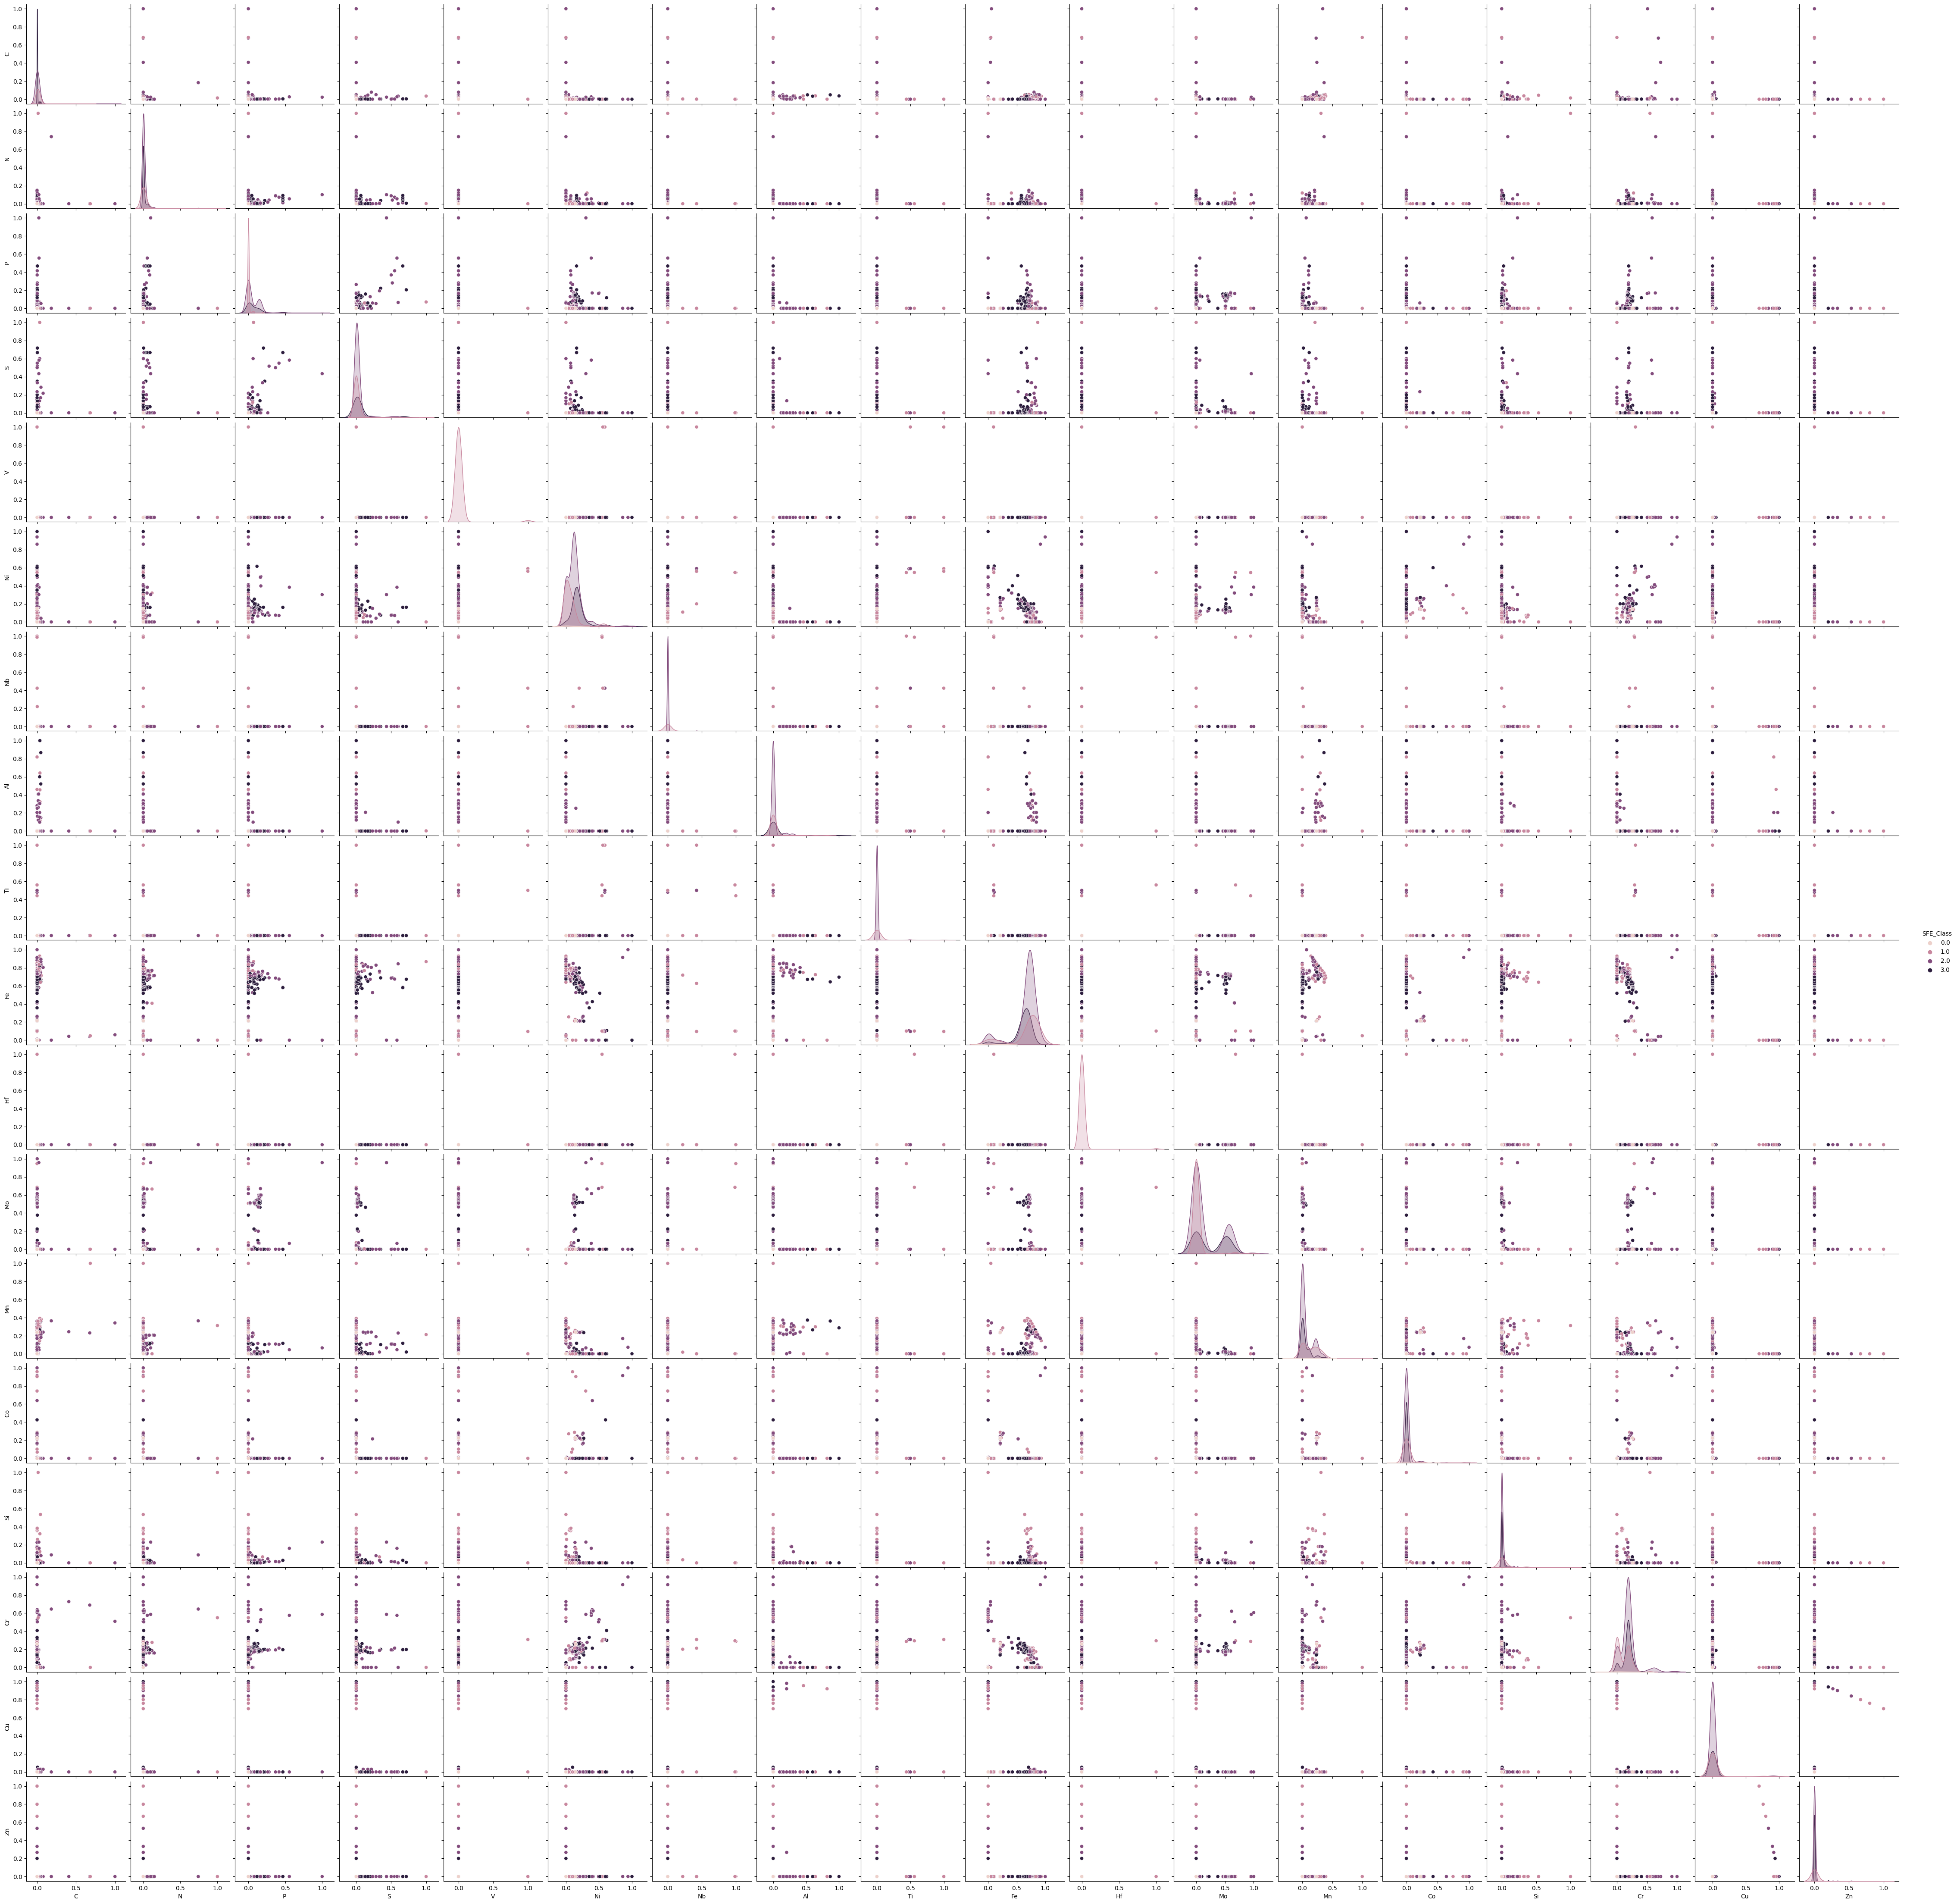

In [ ]:
np_SFE_class=np.column_stack((normalized_data, SFEclass))#np array with features and sfe class
print(np_SFE_class.shape)
col_name_final=['C', 'N', 'P', 'S', 'V', 'Ni', 'Nb', 'Al', 'Ti', 'Fe', 'Hf', 'Mo', 'Mn',
       'Co', 'Si', 'Cr', 'Cu', 'Zn','SFE_Class']
final_df = pd.DataFrame(np_SFE_class, columns=col_name_final)#pandas df with features and sfeclass
sns.pairplot(final_df, hue='SFE_Class')
plt.show()

In [ ]:
X=normalized_data
y=SFEclass
print(X.shape)

(483, 18)


In [ ]:
df_features = pd.DataFrame(features, columns=feature_name)

In [ ]:
correlation_matrix = final_df.corr()
print(correlation_matrix)


                  C         N         P         S         V        Ni  \
C          1.000000  0.047551 -0.072146 -0.012707 -0.012434 -0.162707   
N          0.047551  1.000000  0.057165  0.075193 -0.013297 -0.079814   
P         -0.072146  0.057165  1.000000  0.642087 -0.032959  0.104818   
S         -0.012707  0.075193  0.642087  1.000000 -0.018896 -0.000312   
V         -0.012434 -0.013297 -0.032959 -0.018896  1.000000  0.221584   
Ni        -0.162707 -0.079814  0.104818 -0.000312  0.221584  1.000000   
Nb        -0.018806 -0.020357 -0.050798 -0.029122  0.182097  0.272181   
Al         0.043093 -0.047999 -0.115587 -0.052515 -0.015084 -0.215866   
Ti        -0.021988 -0.023513 -0.058282 -0.033413  0.587173  0.390430   
Fe        -0.175503 -0.159138 -0.027790  0.010357 -0.149823 -0.425753   
Hf        -0.008783 -0.009393 -0.023282 -0.013347 -0.002937  0.146795   
Mo        -0.101940 -0.043457  0.461131 -0.012013 -0.037719  0.181041   
Mn         0.409400  0.149353 -0.208503  0.017229 -

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pipelines = {
    'Random Forest': Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())]),
    'AdaBoost': Pipeline([('scaler', StandardScaler()), ('classifier', AdaBoostClassifier())]),
    'K-Nearest Neighbors': Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
    'Support Vector Machine': Pipeline([('scaler', StandardScaler()), ('classifier', SVC())]),
    'Decision Tree': Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
    'Naive Bayes': Pipeline([('scaler', StandardScaler()), ('classifier', GaussianNB())]),
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())]),
    'Linear Discriminant Analysis': Pipeline([('scaler', StandardScaler()), ('classifier', LinearDiscriminantAnalysis())]),
    'Ridge Classifier': Pipeline([('scaler', StandardScaler()), ('classifier', RidgeClassifier())])
}

# Define hyperparameter grids for each algorithm
param_grids = {
    'Random Forest': {'classifier__n_estimators': [10, 50, 100]},
    'AdaBoost': {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0]},
    'K-Nearest Neighbors': {'classifier__n_neighbors': [3, 5, 7]},
    'Support Vector Machine': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']},
    'Decision Tree': {'classifier__max_depth': [None, 10, 20]},
    'Naive Bayes': {},  # No hyperparameters for Gaussian Naive Bayes
    'Logistic Regression': {'classifier__C': [0.1, 1, 10]},
    'Linear Discriminant Analysis': {},  # No hyperparameters for Linear Discriminant Analysis
    'Ridge Classifier': {'classifier__alpha': [0.1, 1, 10]}
    # Add hyperparameter grids for other algorithms as needed
}

# Perform hyperparameter tuning for each algorithm
for name, pipeline in pipelines.items():
    print(f"Hyperparameter tuning for {name}")

    # Check if the classifier has hyperparameters to tune
    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        print("Best parameters:", grid_search.best_params_)
        print("Training accuracy:", grid_search.best_score_)
        print("Test accuracy:", grid_search.score(X_test, y_test))
        print("\n")
    else:
        # If no hyperparameters, simply fit the model and print accuracy
        pipeline.fit(X_train, y_train)
        accuracy = pipeline.score(X_test, y_test)
        print(f"No hyperparameters to tune. Test accuracy for {name}: {accuracy}\n")



Hyperparameter tuning for Random Forest
Best parameters: {'classifier__n_estimators': 100}
Training accuracy: 0.7693972693972694
Test accuracy: 0.6804123711340206


Hyperparameter tuning for AdaBoost
Best parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}
Training accuracy: 0.5775224775224775
Test accuracy: 0.4948453608247423


Hyperparameter tuning for K-Nearest Neighbors
Best parameters: {'classifier__n_neighbors': 5}
Training accuracy: 0.7225108225108225
Test accuracy: 0.6391752577319587


Hyperparameter tuning for Support Vector Machine
Best parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Training accuracy: 0.7511821511821511
Test accuracy: 0.7319587628865979


Hyperparameter tuning for Decision Tree
Best parameters: {'classifier__max_depth': None}
Training accuracy: 0.7200799200799202
Test accuracy: 0.7216494845360825


Hyperparameter tuning for Naive Bayes
Best parameters: {}
Training accuracy: 0.27475857475857474
Test accuracy: 0.25773

In [ ]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Define hyperparameter grid for further tuning
param_grid = {
    'classifier__C': [6, 7, 8, 9, 10, 11, 13, 14, 15],
    'classifier__kernel': ['rbf'],
    'classifier__gamma': [0.1, 0.01, 0.001, 0.0001],
    'classifier__degree': [2, 3, 4],
    'classifier__decision_function_shape': ['ovo', 'ovr'],
    'classifier__class_weight': [None, 'balanced']
}

# Perform GridSearchCV for further tuning
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from further tuning
best_params_further_tuning = grid_search.best_params_
print("Best parameters after further tuning:", best_params_further_tuning)

# Evaluate the model with the best hyperparameters on the test set
best_model_further_tuning = grid_search.best_estimator_
test_accuracy = best_model_further_tuning.score(X_test, y_test)
print("Test accuracy after further tuning:", test_accuracy)

Best parameters after further tuning: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__decision_function_shape': 'ovo', 'classifier__degree': 2, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Test accuracy after further tuning: 0.7628865979381443


In [ ]:
# rf_model = RandomForestClassifier(random_state=42)

# # Define the hyperparameters and their possible values
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2', None, 0.5, 0.7],
#     'bootstrap': [True, False],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [42]
# }

# # Perform a grid search with cross-validation
# grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Display the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Evaluate the model with the best hyperparameters
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy with Best Hyperparameters:", accuracy)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Hyperparameters:", accuracy)

In [ ]:
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2, 3]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Hyperparameters:", accuracy)

In [ ]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(C=10, class_weight=None, decision_function_shape='ovo', degree=2, gamma=0.1, kernel='rbf'))
])

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 SVC(C=10, decision_function_shape='ovo', degree=2,
                     gamma=0.1))])

In [ ]:
# y_pred = svm_pipeline.predict(X_test)

In [ ]:
# Fe88Co12Cr30Mn40Si15Ni15
test_comp=[0,0,0,0,0,8.234,0,0,0,46.01,0,0,20.75,6.621,3.944,14.60,0,0]
# ['C', 'N', 'P', 'S', 'V', 'Ni', 'Nb', 'Al', 'Ti', 'Fe', 'Hf', 'Mo', 'Mn','Co', 'Si', 'Cr', 'Cu', 'Zn','SFE_Class']

In [ ]:
test_composition = np.array([0,0,0,0,0,8.234,0,0,0,52.631,0,0,20.75,0,3.944,14.60,0,0])
test_input = []

for i in range(1, 2001):
    # Create a copy of the original test_composition array
    temp = test_composition.copy()

    # Modify the fifth and ninth elements
    temp[9] -= i / 100  # Decrease the fifth element
    temp[13] += i / 100  # Increase the ninth element

    # Append the modified array to the test_input list
    test_input.append(temp)

test_inp=np.array(test_input)

norm_test_inp_co, scaler=normalize_data(test_inp[:,:])

print(norm_test_inp_co.shape)
co=norm_test_inp_co[:,13]

(2000, 18)


In [ ]:
test_composition = np.array([0,0,0,0,0,8.234,0,0,0,49.954,0,0,20.75,6.621,0,14.60,0,0])
test_input = []

for i in range(1, 2001):
    # Create a copy of the original test_composition array
    temp = test_composition.copy()

    # Modify the fifth and ninth elements
    temp[9] -= i / 100  # Decrease the fifth element
    temp[14] += i / 100  # Increase the ninth element

    # Append the modified array to the test_input list
    test_input.append(temp)

test_inp=np.array(test_input)

norm_test_inp_si, scaler=normalize_data(test_inp[:,:])

print(norm_test_inp_si.shape)
si=norm_test_inp_si[:,14]

(2000, 18)


In [ ]:
test_composition = np.array([0,0,0,0,0,0,0,0,0,54.244,0,0,20.75,6.621,3.944,14.60,0,0])
test_input = []

for i in range(1, 1401):
    # Create a copy of the original test_composition array
    temp = test_composition.copy()

    # Modify the fifth and ninth elements
    temp[9] -= i / 100  # Decrease the fifth element
    temp[5] += i / 100  # Increase the ninth element

    # Append the modified array to the test_input list
    test_input.append(temp)

test_inp=np.array(test_input)

norm_test_inp_ni, scaler=normalize_data(test_inp[:,:])

print(norm_test_inp_ni.shape)
ni=norm_test_inp_ni[:,5]

(1400, 18)


[1. 1. 1. ... 1. 1. 1.]


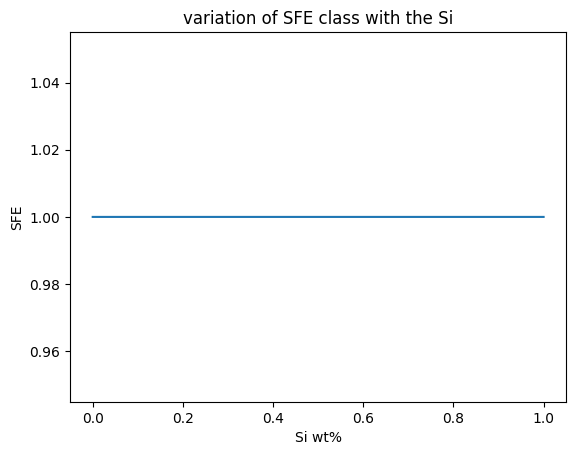

In [ ]:
y_pred_si = svm_pipeline.predict(norm_test_inp_si)
print(y_pred_si)
plt.plot(si, y_pred_si)

# Add labels and title
plt.xlabel('Si wt%')
plt.ylabel('SFE')
plt.title('variation of SFE class with the Si')

# Show the plot
plt.show()

[1. 1. 1. ... 1. 1. 1.]


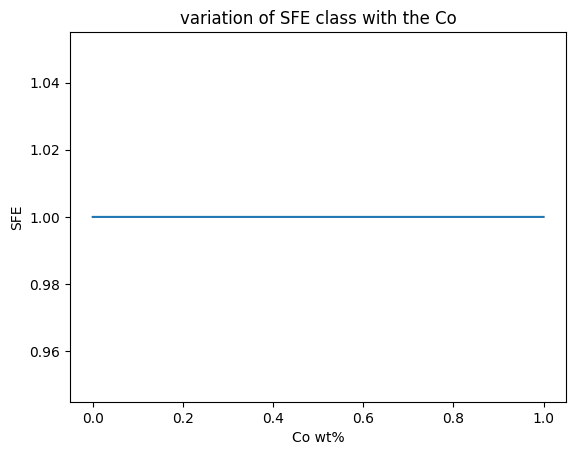

In [ ]:
y_pred_co = svm_pipeline.predict(norm_test_inp_co)
print(y_pred_co)
plt.plot(si, y_pred_co)

# Add labels and title
plt.xlabel('Co wt%')
plt.ylabel('SFE')
plt.title('variation of SFE class with the Co')

# Show the plot
plt.show()

[1. 1. 1. ... 3. 3. 3.]


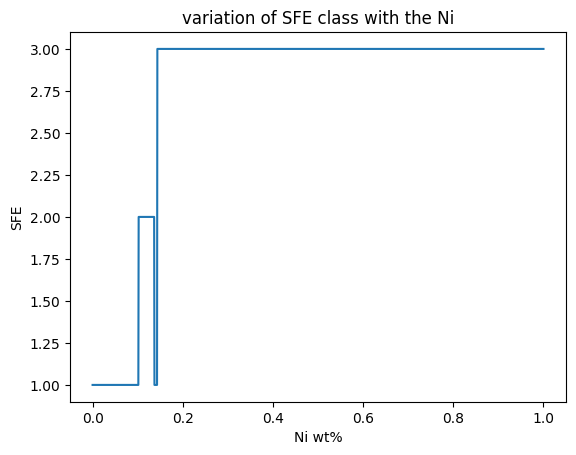

In [ ]:
y_pred_ni = svm_pipeline.predict(norm_test_inp_ni)
print(y_pred_ni)
plt.plot(ni, y_pred_ni)

# Add labels and title
plt.xlabel('Ni wt%')
plt.ylabel('SFE')
plt.title('variation of SFE class with the Ni')

# Show the plot
plt.show()
